In [1]:
# mute warnings
import warnings
warnings.filterwarnings('ignore')

import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# Data set
**We're going to use the Motor Trends Cars ("mtcars") data set that is built into the R programming language.**
```
mpg - Miles per Gallon
cyl - # of cylinders
disp - displacement, in cubic inches
hp - horsepower
drat - driveshaft ratio
wt - weight
qsec - 1/4 mile time; a measure of acceleration
vs - 'V' or straight - engine shape
am - transmission; auto or manual
gear - # of gears
carb - # of carburetors.
```

In [2]:
# Load the dataset
df = pd.read_csv("mtcars.csv")
# Here we are going to use the "model" of the car as a the index to our dataframe
df.set_index('model', inplace=True)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
# Descriptive statistics
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [4]:
# Check whether there are any missing values
df.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [5]:
# Heatmap based on standardized values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns, index=df.index)
# scaled_df.abs().sum(axis=1)
df.style.background_gradient(cmap ='coolwarm', gmap=scaled_df, axis=None, vmin=-3, vmax=3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.000000,6,160.000000,110,3.900000,2.620000,16.460000,0,1,4,4
Mazda RX4 Wag,21.000000,6,160.000000,110,3.900000,2.875000,17.020000,0,1,4,4
Datsun 710,22.800000,4,108.000000,93,3.850000,2.320000,18.610000,1,1,4,1
Hornet 4 Drive,21.400000,6,258.000000,110,3.080000,3.215000,19.440000,1,0,3,1
Hornet Sportabout,18.700000,8,360.000000,175,3.150000,3.440000,17.020000,0,0,3,2
Valiant,18.100000,6,225.000000,105,2.760000,3.460000,20.220000,1,0,3,1
Duster 360,14.300000,8,360.000000,245,3.210000,3.570000,15.840000,0,0,3,4
Merc 240D,24.400000,4,146.700000,62,3.690000,3.190000,20.000000,1,0,4,2
Merc 230,22.800000,4,140.800000,95,3.920000,3.150000,22.900000,1,0,4,2


# Use regression models to predict fuel comsumption(mpg)

In [6]:
from sklearn import  linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### split the dataset into training and test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,1:], df.iloc[:,0], test_size=0.1, random_state=42)

## Linear Regression

In [8]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)
print(X_train.columns)
print(regr.coef_)
#Predict using the test set
pred = regr.predict(X_test)

#Calculate the metrics for regression
reg_r2 = r2_score(y_test, pred)
reg_mse = mean_squared_error(y_test, pred)
print('------------')
print(reg_r2, reg_mse)

Index(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')
[-0.40110818  0.01316612 -0.02167558  0.59836675 -3.83000087  0.70898298
  0.07163707  1.57941842  0.659154    0.0778369 ]
------------
0.8383955580471787 9.935744099588113


## SVM for regression

In [9]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [10]:
# Create svm regression object
regr_svm = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1.0, epsilon=0.2))

# Train the model using the training sets
regr_svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2, kernel='linear'))])

In [11]:
#Predict using the test set
pred = regr_svm.predict(X_test)

#Calculate the metrics for regression
svm_r2 = r2_score(y_test, pred)
svm_mse = mean_squared_error(y_test, pred)

In [12]:
print(svm_r2, svm_mse)

0.784034144131135 13.27798575479757


## Gradient Boosting for regression

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

In [14]:
# Create gradient boosting regression object
reg_gb = GradientBoostingRegressor(random_state=0)

# Train the model using the training sets
reg_gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [15]:
#Predict using the test set
pred = reg_gb.predict(X_test)

#Calculate the metrics for regression
gb_r2 = r2_score(y_test, pred)
gb_mse = mean_squared_error(y_test, pred)

In [16]:
#Make a table to compare the performance of different models
pd.DataFrame({'LinearRegression':[reg_r2,reg_mse], 'SVM':[svm_r2, svm_mse],  'GradientBoosting':[gb_r2, gb_mse]}, index=['R2', 'MSE'])

,LinearRegression,SVM,GradientBoosting
R2,0.838396,0.784034,0.876541
MSE,9.935744,13.277986,7.590488


## Outlier Detection: univariate case

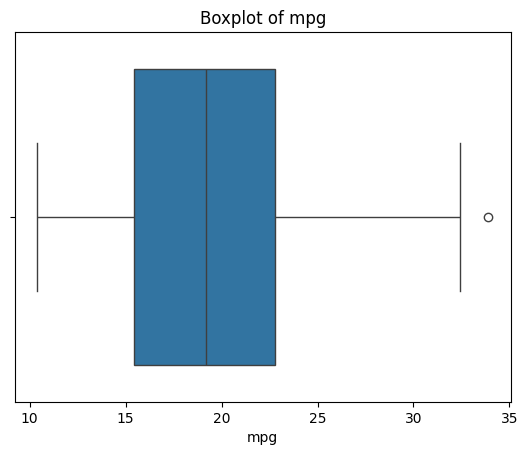

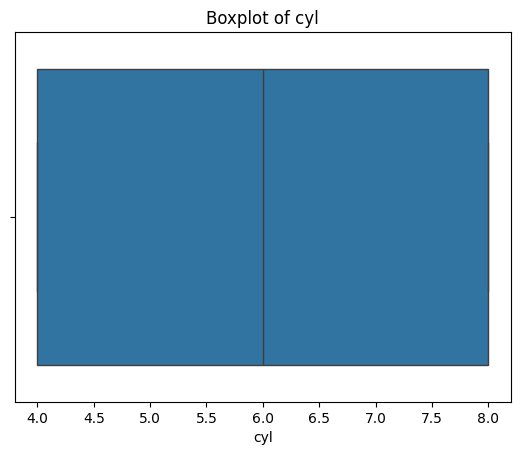

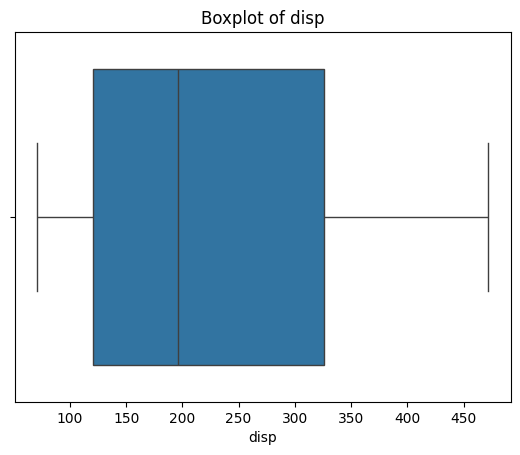

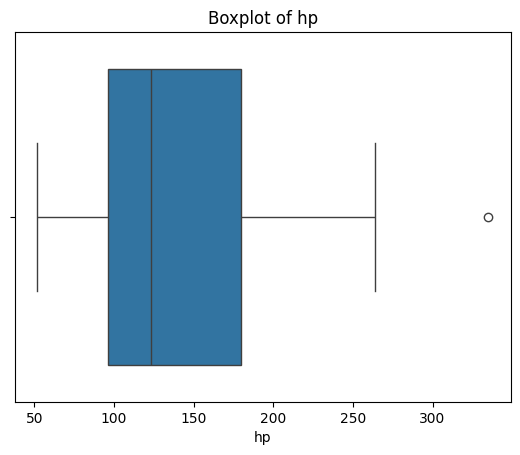

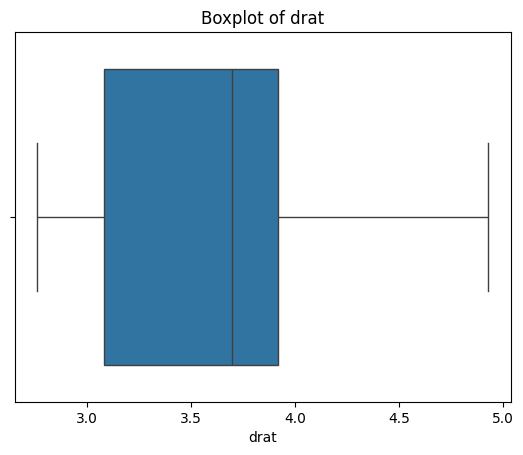

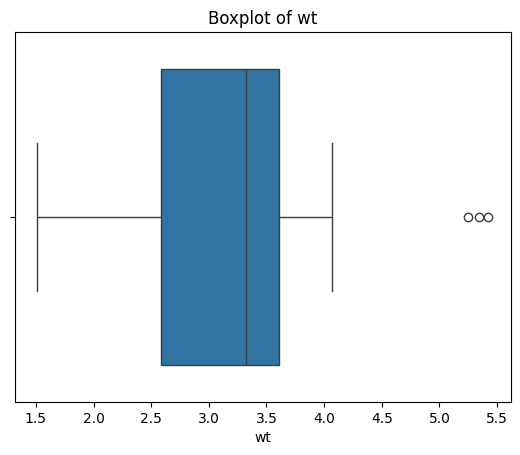

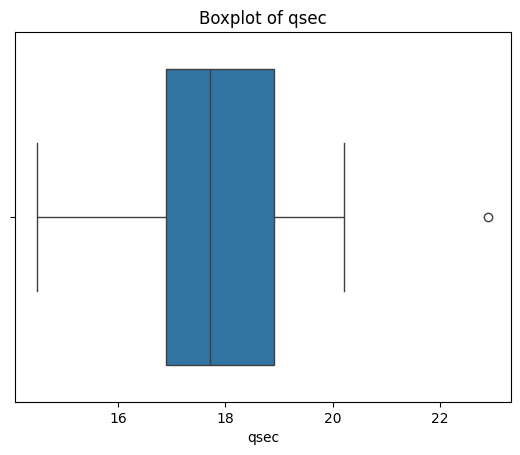

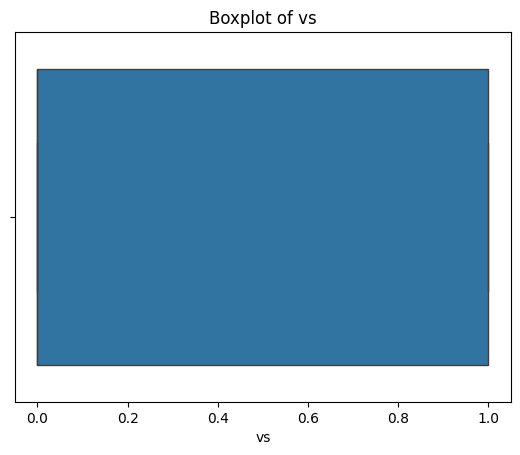

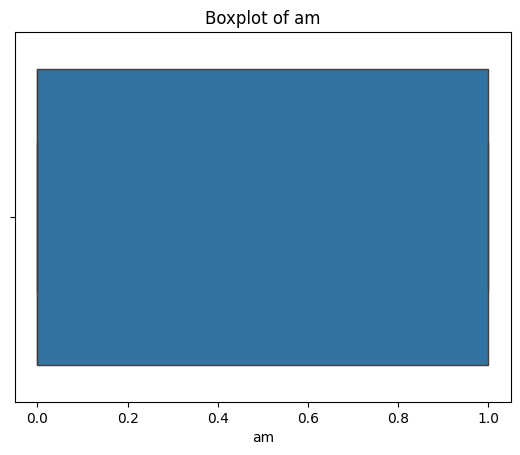

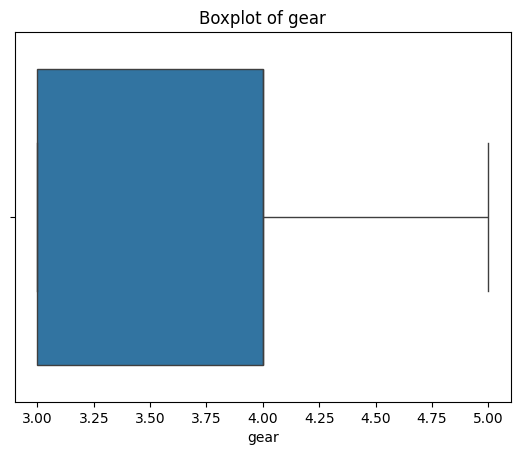

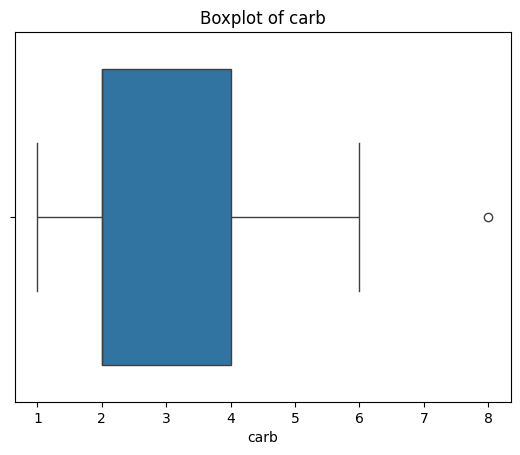

In [17]:
# Create a SNS Boxplot to find outliers in each column

columns = df.columns

for column in columns: 
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()


In [18]:
# Find the outliers for "wt"
wtQ1 = df['wt'].quantile(0.25)
wtQ3 = df['wt'].quantile(0.75)
wtIQR = wtQ3 - wtQ1    #IQR is interquartile range.
print(wtQ1, wtQ3, wtIQR)

wt_upper_limit = (wtQ3 + 1.5 * wtIQR)
wt_lower_limit = (wtQ1 - 1.5 * wtIQR)
# Show the boxplot outliers
df.loc[(df['wt'] < wt_lower_limit) | (df['wt'] > wt_upper_limit)]

2.58125 3.61 1.02875


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4


In [19]:
# Find the outliers for "hp"
hpQ1 = df['hp'].quantile(0.25)
hpQ3 = df['hp'].quantile(0.75)
hpIQR = hpQ3 - hpQ1    #IQR is interquartile range.
print(hpQ1, hpQ3, hpIQR)

hp_upper_limit = (hpQ3 + 1.5 * hpIQR)
hp_lower_limit = (hpQ1 - 1.5 * hpIQR)
# Show the boxplot outliers
df.loc[(df['hp'] < hp_lower_limit) | (df['hp'] > hp_upper_limit)]


96.5 180.0 83.5


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


In [20]:
# Find the outliers for "qsec"
qsecQ1 = df['qsec'].quantile(0.25)
qsecQ3 = df['qsec'].quantile(0.75)
qsecIQR = qsecQ3 - qsecQ1    #IQR is interquartile range.
print(qsecQ1, qsecQ3, qsecIQR)

qsec_upper_limit = (qsecQ3 + 1.5 * qsecIQR)
qsec_lower_limit = (qsecQ1 - 1.5 * qsecIQR)
# Show the boxplot outliers
df.loc[(df['qsec'] < qsec_lower_limit) | (df['qsec'] > qsec_upper_limit)]

16.8925 18.9 2.0075000000000003


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Merc 230,22.8,4,140.8,95,3.92,3.15,22.9,1,0,4,2


## Outlier Treatments

### Capping Outliers (using IQR)

In [21]:
df2 = X_train.copy()

In [22]:
# This code will "cap" (or floor) the outliers to our limit for the wt predictor
df2['wt'] = np.where(df2['wt'] > wt_upper_limit,
  wt_upper_limit,
  np.where(
    df2['wt'] < wt_lower_limit,
    wt_lower_limit,
    df2['wt']
   )
)

In [23]:
#cap/floor for HP predictor
df2['hp'] = np.where(df2['hp'] > hp_upper_limit,
  hp_upper_limit,
  np.where(
    df2['hp'] < hp_lower_limit,
    hp_lower_limit,
    df2['hp']
   )
)

In [24]:
#cap/floor for the Qsec Predictor
df2['qsec'] = np.where(df2['qsec'] > qsec_upper_limit,
  qsec_upper_limit,
  np.where(
    df2['qsec'] < qsec_lower_limit,
    qsec_lower_limit,
    df2['qsec']
   )
)

In [25]:
# Use describe to ensure our min/max looks right
df2.describe()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,6.142857,224.978571,144.044643,3.618214,3.158009,17.868973,0.464286,0.392857,3.678571,2.750000
std,1.799471,116.042580,67.338698,0.544066,0.900980,1.733991,0.507875,0.497347,0.722832,1.554563
min,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.000000
25%,4.000000,120.825000,96.500000,3.132500,2.581250,16.892500,0.000000,0.000000,3.000000,2.000000
50%,6.000000,196.300000,118.000000,3.715000,3.325000,17.790000,0.000000,0.000000,4.000000,2.000000
75%,8.000000,307.500000,180.000000,3.920000,3.570000,18.900000,1.000000,1.000000,4.000000,4.000000
max,8.000000,472.000000,305.250000,4.930000,5.153125,21.911250,1.000000,1.000000,5.000000,8.000000


In [26]:
########### Linear Regression ############
regr = linear_model.LinearRegression()
regr.fit(df2, y_train)
pred = regr.predict(X_test)
reg_r2_capped = r2_score(y_test, pred)
reg_mse_capped = mean_squared_error(y_test, pred)

#################### SVM ####################
regr_svm = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1.0, epsilon=0.2))
regr_svm.fit(df2, y_train)
pred = regr_svm.predict(X_test)
svm_r2_capped = r2_score(y_test, pred)
svm_mse_capped = mean_squared_error(y_test, pred)

#################### Gradient Boosting ####################
reg_gb = GradientBoostingRegressor(random_state=0)
reg_gb.fit(df2, y_train)
pred = reg_gb.predict(X_test)
gb_r2_capped = r2_score(y_test, pred)
gb_mse_capped = mean_squared_error(y_test, pred)

In [27]:
# compare metrics: no treatment VS "capped"
pd.DataFrame(
    {'LinearRegression':[reg_r2,reg_r2_capped],
        'SVM':[svm_r2, svm_r2_capped],
        'GradientBoosting':[gb_r2, gb_r2_capped]},
    index=['R2', 'R2_capped'])

,LinearRegression,SVM,GradientBoosting
R2,0.838396,0.784034,0.876541
R2_capped,0.840594,0.780404,0.880187


In [28]:
pd.DataFrame(
    {'LinearRegression':[reg_mse,reg_mse_capped],
     'SVM':[svm_mse, svm_mse_capped],
     'GradientBoosting':[gb_mse, gb_mse_capped]},
    index=['MSE', 'MSE_capped'])

,LinearRegression,SVM,GradientBoosting
MSE,9.935744,13.277986,7.590488
MSE_capped,9.800564,13.501195,7.366320


### Removing rows with outliers

In [29]:
df3 = X_train.copy()

In [30]:
# This code will remove outliers beyond our limit for the wt predictor
y_train.drop(y_train[(df3.wt < wt_lower_limit) | (df3.wt > wt_upper_limit)].index, inplace=True)
df3.drop(df3[df3.wt < wt_lower_limit].index, inplace=True)
df3.drop(df3[df3.wt > wt_upper_limit].index, inplace=True)

In [31]:
#remove outliers for the hp predictor
y_train.drop(y_train[(df3.hp < hp_lower_limit) | (df3.hp > hp_upper_limit)].index, inplace=True)
df3.drop(df3[df3.hp < hp_lower_limit].index, inplace=True)
df3.drop(df3[df3.hp > hp_upper_limit].index, inplace=True)

In [32]:
#remove outliers for the qsec predictor
y_train.drop(y_train[(df3.qsec < qsec_lower_limit) | (df3.qsec > qsec_upper_limit)].index, inplace=True)
df3.drop(df3[df3.qsec < qsec_lower_limit].index, inplace=True)
df3.drop(df3[df3.qsec > qsec_upper_limit].index, inplace=True)

In [33]:
# Use describe to ensure our min/max looks right
df3.describe()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,6.000000,206.066667,133.250000,3.653750,2.974917,17.850833,0.500000,0.416667,3.666667,2.458333
std,1.769303,101.054405,59.027812,0.561069,0.751299,1.531319,0.510754,0.503610,0.701964,1.178767
min,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.000000
25%,4.000000,120.250000,96.000000,3.132500,2.428750,16.892500,0.000000,0.000000,3.000000,1.750000
50%,6.000000,167.600000,111.500000,3.750000,3.202500,17.800000,0.500000,0.000000,4.000000,2.000000
75%,8.000000,282.850000,176.250000,3.960000,3.475000,18.900000,1.000000,1.000000,4.000000,4.000000
max,8.000000,360.000000,264.000000,4.930000,4.070000,20.220000,1.000000,1.000000,5.000000,4.000000


In [34]:
########### Linear Regression ############
regr = linear_model.LinearRegression()
regr.fit(df3, y_train)
pred = regr.predict(X_test)
reg_r2_removed = r2_score(y_test, pred)
reg_mse_removed = mean_squared_error(y_test, pred)



#################### SVM ####################
regr_svm = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1.0, epsilon=0.2))
regr_svm.fit(df3, y_train)
pred = regr_svm.predict(X_test)
svm_r2_removed = r2_score(y_test, pred)
svm_mse_removed = mean_squared_error(y_test, pred)
print('------------')


#################### Gradient Boosting ####################
reg_gb = GradientBoostingRegressor(random_state=0)
reg_gb.fit(df3, y_train)
pred = reg_gb.predict(X_test)
gb_r2_removed = r2_score(y_test, pred)
gb_mse_removed = mean_squared_error(y_test, pred)
print('------------')


------------
------------


In [35]:
# compare metrics: no treatment VS "capped" VS "removed"
pd.DataFrame(
    {'LinearRegression':[reg_r2,reg_r2_capped,reg_r2_removed],
        'SVM':[svm_r2, svm_r2_capped, svm_r2_removed],
        'GradientBoosting':[gb_r2, gb_r2_capped, gb_r2_removed]},
    index=['R2', 'R2_capped', 'R2_removed'])

,LinearRegression,SVM,GradientBoosting
R2,0.838396,0.784034,0.876541
R2_capped,0.840594,0.780404,0.880187
R2_removed,0.714471,0.782641,0.722095


In [36]:
pd.DataFrame(
    {'LinearRegression':[reg_mse,reg_mse_capped,reg_mse_removed],
     'SVM':[svm_mse, svm_mse_capped, svm_mse_removed],
     'GradientBoosting':[gb_mse, gb_mse_capped, gb_mse_removed]},
    index=['MSE', 'MSE_capped', 'MSE_removed'])

,LinearRegression,SVM,GradientBoosting
MSE,9.935744,13.277986,7.590488
MSE_capped,9.800564,13.501195,7.366320
MSE_removed,17.554841,13.363656,17.086114


## Outlier Detection: multivariate case

In [37]:
# use LOF (with 5 nearest neighbors) to detection multivariate outliers
# and eliminate rows with and lof score > 1.3
from pyod.models.lof import LOF

df4 = df.copy()

lof_rl = LOF(n_neighbors=5)
lof_rl.fit(df4)

# Finding LOF Scores
lof_scores_train = lof_rl.decision_scores_

# Show all Scores
df4['LOF_Score'] = lof_scores_train
df4.sort_values('LOF_Score', ascending=False)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,LOF_Score
model,,,,,,,,,,,,
Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6,1.587094
Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8,1.570968
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,1.432937
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,1.237937
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1.229866
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,1.195461
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1,1.173683
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1,1.167617
Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4,1.159139


In [38]:
# drop scores greater than 1.3 and sort by greatest to least
df4 = df4[df4['LOF_Score'] <= 1.3]
df4 = df4.sort_values(by='LOF_Score', ascending=False)
df4

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,LOF_Score
model,,,,,,,,,,,,
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,1.237937
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1.229866
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,1.195461
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1,1.173683
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1,1.167617
Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4,1.159139
Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4,1.142798
Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4,1.128107
Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4,1.127728


In [39]:
df4 = df4.drop(columns=['LOF_Score'], inplace=False)

In [45]:
# Rebuild the models
X_train_lof, X_test_lof, y_train_lof, y_test_lof = train_test_split(
    df4.iloc[:,1:], df4.iloc[:,0], test_size=0.1, random_state=42)

########### Linear Regression ############
regr = linear_model.LinearRegression()
regr.fit(X_train_lof, y_train_lof)
pred = regr.predict(X_test)
reg_r2_removed_lof = r2_score(y_test, pred)
reg_mse_removed_lof = mean_squared_error(y_test, pred)
print('Linear Regression')
print(X_train.columns)
print(regr.coef_)
print('-------')

#################### SVM ####################
regr_svm = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1.0, epsilon=0.2))
regr_svm.fit(X_train_lof, y_train_lof)
pred = regr_svm.predict(X_test)
svm_r2_removed_lof = r2_score(y_test, pred)
svm_mse_removed_lof = mean_squared_error(y_test, pred)


#################### Gradient Boosting ####################
reg_gb = GradientBoostingRegressor(random_state=0)
reg_gb.fit(X_train_lof, y_train_lof)
pred = reg_gb.predict(X_test)
gb_r2_removed_lof = r2_score(y_test, pred)
gb_mse_removed_lof = mean_squared_error(y_test, pred)
print('Gradient Boosting')
print(X_train_lof.columns)
print(reg_gb.feature_importances_)


Linear Regression
Index(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')
[-0.05797362  0.00461904 -0.00460456  0.34180882 -3.1441907   1.47949302
 -0.14454454  3.03273688  1.17131605 -0.65849421]
-------
Gradient Boosting
Index(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')
[1.27243682e-01 2.01626834e-01 1.44207240e-01 2.17378982e-03
 4.92413422e-01 2.55048477e-02 2.01736142e-04 2.53005140e-05
 1.68452409e-04 6.43469620e-03]


In [41]:
# compare metrics: no treatment VS "capped" VS "removed"
pd.DataFrame(
    {'LinearRegression':[reg_r2,reg_r2_capped,reg_r2_removed,reg_r2_removed_lof],
        'SVM':[svm_r2, svm_r2_capped, svm_r2_removed, svm_r2_removed_lof],
        'GradientBoosting':[gb_r2, gb_r2_capped, gb_r2_removed, gb_r2_removed_lof]},
    index=['R2', 'R2_capped', 'R2_removed', 'R2_removed_lof'])

,LinearRegression,SVM,GradientBoosting
R2,0.838396,0.784034,0.876541
R2_capped,0.840594,0.780404,0.880187
R2_removed,0.714471,0.782641,0.722095
R2_removed_lof,0.916821,0.873599,0.976491


In [42]:
pd.DataFrame(
    {'LinearRegression':[reg_mse,reg_mse_capped,reg_mse_removed,reg_mse_removed_lof],
     'SVM':[svm_mse, svm_mse_capped, svm_mse_removed, svm_mse_removed_lof],
     'GradientBoosting':[gb_mse, gb_mse_capped, gb_mse_removed, gb_mse_removed_lof]},
    index=['MSE', 'MSE_capped', 'MSE_removed', 'MSE_removed_lof'])

,LinearRegression,SVM,GradientBoosting
MSE,9.935744,13.277986,7.590488
MSE_capped,9.800564,13.501195,7.366320
MSE_removed,17.554841,13.363656,17.086114
MSE_removed_lof,5.113976,7.771392,1.445399


# Q1. What were the top 4 most influential features in the `regr` model above?


The top 4 most influential features in the regr model above were: 

1. drat: -3.1441907
2. am: 3.03273688   
3. wt: 1.47949302
4. gear: 1.17131605 

# Q2. What was the most influential features in the `regr` model above?  What was the most influential feature in the `reg_gb` model above?


Most influential Regr Feature: 
- Drat: -3.1441907

Most Influential Reg_gb feature: 
- wt: 4.92413422e-01

# Q3. In the original data set (df) which car looks more like a bivariate outlier with respect to disp and drat? Masarati Bora, Ford Pantera L, or the Toyota Corolla?


As shown in the scatterplot below, the Ford Pantera L seems to be the bivariate outlier with respect to disp and drat. Compared to the Corolla or Bora it is father removed from other models. The Bora is closer to that low drat cluster and the corolla to that low disp cluster. 

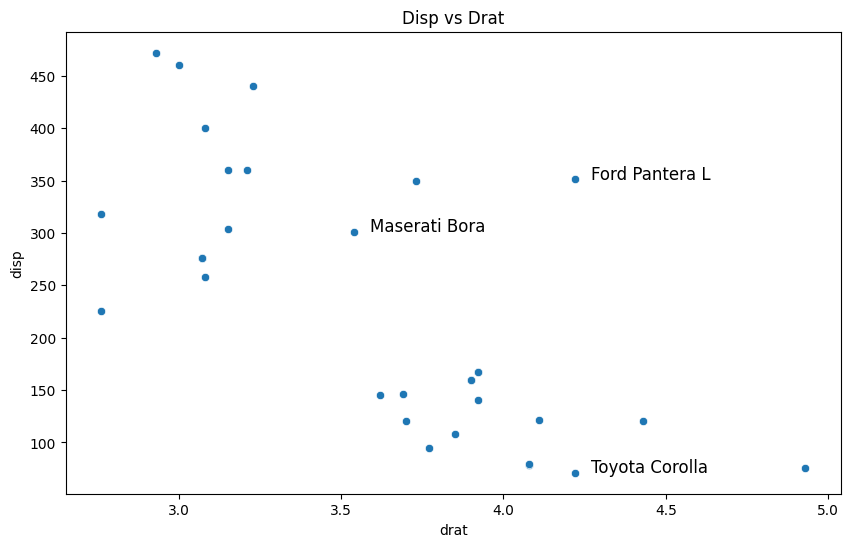

In [43]:
# models of interest
models = ["Maserati Bora", "Ford Pantera L", "Toyota Corolla"]

plt.figure(figsize=(10, 6))

# Create scatter plot for disp vs drat
sns.scatterplot(data=df, x='drat', y='disp')

# label's for models of interest
for i in range(df.shape[0]):
    if df.index[i] in models: 
        plt.text(df['drat'].iloc[i] + 0.05, df['disp'].iloc[i], df.index[i], 
                 fontsize=12, color='black') 

# Labels for axis/title
plt.xlabel('drat')
plt.ylabel('disp')
plt.title('Disp vs Drat')

plt.show()


# Q4. Could the `scipy.stats.mstats.winsorize` function in Python be used to easily treat *only* the outliers we found with `sns.boxplot`?  Explain.


I don't think that the scipy.stats.mstats.winsorize would be the best way to easily treat outliers found in the sns.boxplot. This funciton works be replacing outliers with values within a specified range, rather than removing them. Ex: If you want to winsorize at the 90th percentile, anything value over the 90th percentile would be replaced with the value at the 90th percentile. This doesn't translate well into IQR, because of that reliance on percentile boundaires. I think what we did earlier with just using above/below 1.5 * IQR as a cut off was the easiest wy to treat outliers


# Q5. How does the "capping" the outliers affect model performance?  What happens if you change the `random_state` to 43 in the train/test split (and then re-build the models)?  What could be done to provide more robust error metrics?


Capping helps to limit the impact of outliers by replacing extreme values with a threshold, rather than removing them. For example, if you have the following dataset [5, 10, 15, 20, 25] and set a lower cap at 10, the 5 value will be replaced with 10. This helps reduce the influece of outliers and reduce variance, but increase bias. In our example we see slight increased model performance for capping with the linear regression and gradient boosting models. 

Changing the random_state to 43 will change the way in which the data is split between the training and test groups. When we change to this random_state split we get a decrese in perforamnce. 


Random_state = 42

LinearRegression, SVM, GradientBoosting

R2:	0.838396, 0.784034, 0.876541

R2_capped: 0.840594, 0.780404, 0.880187

LinearRegression, SVM	GradientBoosting

MSE: 9.935744, 13.277986, 7.590488

MSE_capped:	9.800564, 13.501195, 7.366320

Random_state = 43

LinearRegression, SVM, GradientBoosting

R2	0.525398, 0.379197, 0.745425

R2_capped 0.509041, 0.373720, 0.744173

LinearRegression, SVM, GradientBoosting

MSE	5.520512, 7.221104, 2.961189

MSE_capped 5.710769, 7.284808, 2.975746

In order to have more robust error metrics we could test on metrics that are less sensitive to outliers such as Mean Absolute Error, or we could do some boot strapping (creating multiple training sets that are resampling with replacement).


# Q6. *On average (given many different train/test splits)*, what modeling method is most affected by the removal of outliers in this data set?  Why?


Typically we see Linear Regression models are most impacted by the removal of outliers, because they are inheriently more sensitive to outliers and will skew towards them compared to the SVM or Gradient Boosting Models.  

However we see that in this case the Gradient Boosting Model's are being most impacted by the removal of outliers with an R2 change of ~.16 and MSE change of ~10, which is the highest of any modeling method. This holds true over many different train test splits. 

LinearRegression, SVM, GradientBoosting

R2:0.838396, 0.784034, 0.876541

R2_capped: 0.840594, 0.780404, 0.880187

R2_removed: 0.714471, 0.782641, 0.722095

R2_removed_lof: 0.916821, 0.873599, 0.976491
	

LinearRegression, SVM, GradientBoosting

MSE:9.935744, 13.277986, 7.590488

MSE_capped: 9.800564, 13.501195, 7.366320

MSE_removed: 17.554841, 13.363656, 17.086114

MSE_removed_lof: 5.113976, 7.771392, 1.445399

# Q7. What car has the 4th highest LOF value?  What attributes of this car showed up as univariate outliers according to our boxplots (IQR * 1.5 method)?


The Honda Civic has the fourth highest LOF Score at 1.237937 with DISP & DRAT showing as an outlier accourding to our boxplots.

# Q8. In LOF method, there is a hyperparameter, what is it?  And what does it represent?

The n_neighbors hyperparameter determines the number of neighboring points used to calculate how isolated a data point is, or in this case, how isolated a car model is. In this example, it's set to five, meaning each car model is compared to its five nearest neighbors based on the selected features. The more different a car's features are from its nearest five neighbors, the more likely it is to be considered an outlier.

# Q9. Which outlier treatment worked best on this data set? [given the random_state=42 when splitting the data]

As shown by the results below the R2_removed_lof Gradient Boosting Model performed the best in regards to R2 and MSE. With a R2 of .976491 and MSE of 1.445399. Overall the Lof Removal method saw the highest overall R2 and lowest MSE's for each method. 

LinearRegression, SVM, GradientBoosting

R2:0.838396, 0.784034, 0.876541

R2_capped: 0.840594, 0.780404, 0.880187

R2_removed: 0.714471, 0.782641, 0.722095

R2_removed_lof: 0.916821, 0.873599, 0.976491
	

LinearRegression, SVM, GradientBoosting

MSE:9.935744, 13.277986, 7.590488

MSE_capped: 9.800564, 13.501195, 7.366320

MSE_removed: 17.554841, 13.363656, 17.086114

MSE_removed_lof: 5.113976, 7.771392, 1.445399

# Q10. Which model is most likely to exhibit benign over-fitting?  If we theoretically put these models into production and tested them on new (previously unseen) cars, how might we detect that over-fitting?  Is it possible that what we previously treated as "outliers" would appear more "normal" in our data over time?

Gradient Boosting is the most likely model to show benign overfitting. This happens because, as we add more iterations to the model, it fits that training data more closely, instead of capturing the general trend of the full dataset. We can see this as we add more testing data; if the model starts to perform worse as new data is added, this is an indication that it has overfit the training data. We can use the R2 and MSE to track this performance. It is possible that what we originally had as outliers could become more normal overtime. If new data is added to the dataset, the distribution could shift making these outliers into the normal range of the dataset. 
